In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from dtne import *
import time

In [3]:
adata = sc.read_h5ad('nestorowa.data2.h5ad')
adata

AnnData object with n_obs × n_vars = 1656 × 46078
    obs: 'cell_label'
    uns: 'iroot'
    obsm: 'X_pca'

In [4]:
X_pca = adata.obsm['X_pca']
cell_label = adata.obs['cell_label']

In [5]:
set(cell_label.values)

{1, 2, 3, 4, 5, 6, 7, 8, 9}

The code runs 5s.


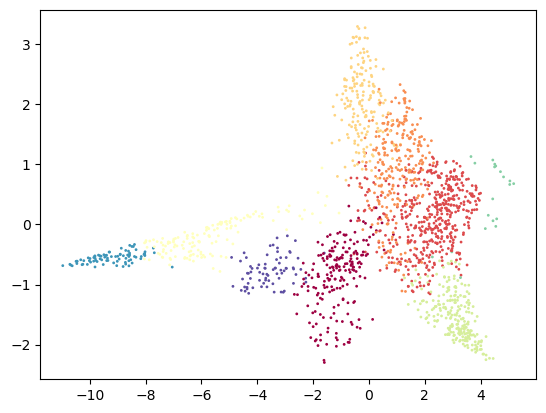

In [6]:
start_time = time.time()
embedding = DTNE(k_neighbors =15) 
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_label,s=1,cmap='Spectral')

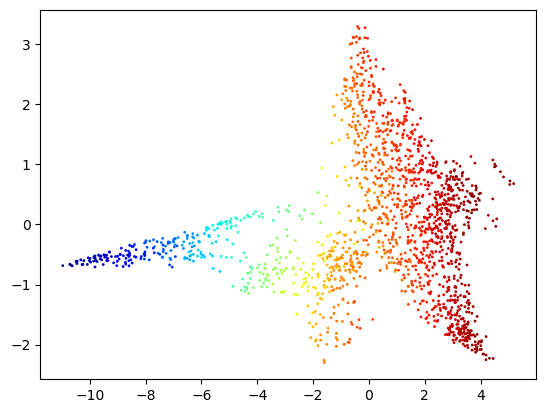

In [7]:
diff_time = embedding.order_cells(root_cells=[657])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=1,cmap='jet')

In [8]:
pd.DataFrame(Y).to_csv('nest.Y_dtne.csv')
pd.DataFrame(diff_time).to_csv('nest.dtne_pseudotime.csv')